# **APRENDIZAGEM SUPERVISIONADA: REGRESSÃO**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever o valor do preço médio de casas em Boston. 

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/schirmerchad/bostonhoustingmlnd

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/machine_learning/housing.csv',
                    sep=',', encoding='iso-8859-1')

In [4]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


**Atributos previsores**

RM: é o número médio de cômodos entre os imóveis no bairro.

LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa" (proletariado).

PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.

**Variável alvo**

MEDV: valor médio das casas

In [5]:
df.shape

(489, 4)

## **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

Valores Missing (NAN)

In [6]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

**Análise dos tipos de atributos.**

In [7]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

**Dados Estatísticos**

In [8]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


**Análise dos outliers**

In [9]:
import plotly.express as px

In [10]:
boxplot = px.box(df, y="RM")
boxplot.show()

In [11]:
boxplot = px.box(df, y="LSTAT")
boxplot.show()

In [12]:
boxplot = px.box(df, y="PTRATIO")
boxplot.show()

In [13]:
boxplot = px.box(df, y="MEDV")
boxplot.show()

## **CORRELAÇÃO LINEAR**

In [14]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


**Atributos previsores**

RM: é o número médio de cômodos entre os imóveis no bairro.

LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa" (proletariado).

PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.

**Variável alvo**

MEDV: valor médio das casas

In [15]:
import matplotlib.pyplot as plt

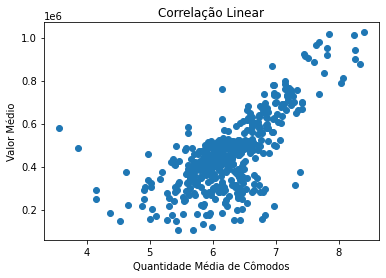

In [16]:
plt.scatter(df.RM, df.MEDV)
plt.title('Correlação Linear')
plt.xlabel('Quantidade Média de Cômodos')
plt.ylabel('Valor Médio')
plt.grid(False)

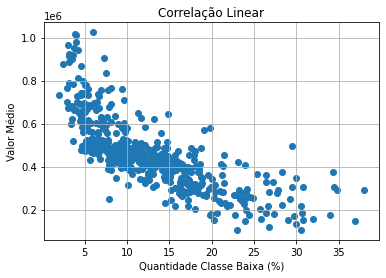

In [17]:
plt.scatter(df.LSTAT, df.MEDV)
plt.title('Correlação Linear')
plt.xlabel('Quantidade Classe Baixa (%)')
plt.ylabel('Valor Médio')
plt.grid(True)


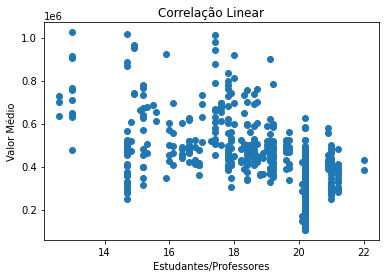

In [18]:
plt.scatter(df.PTRATIO, df.MEDV)
plt.title('Correlação Linear')
plt.xlabel('Estudantes/Professores')
plt.ylabel('Valor Médio')
plt.grid(False)

In [19]:
import seaborn as sns

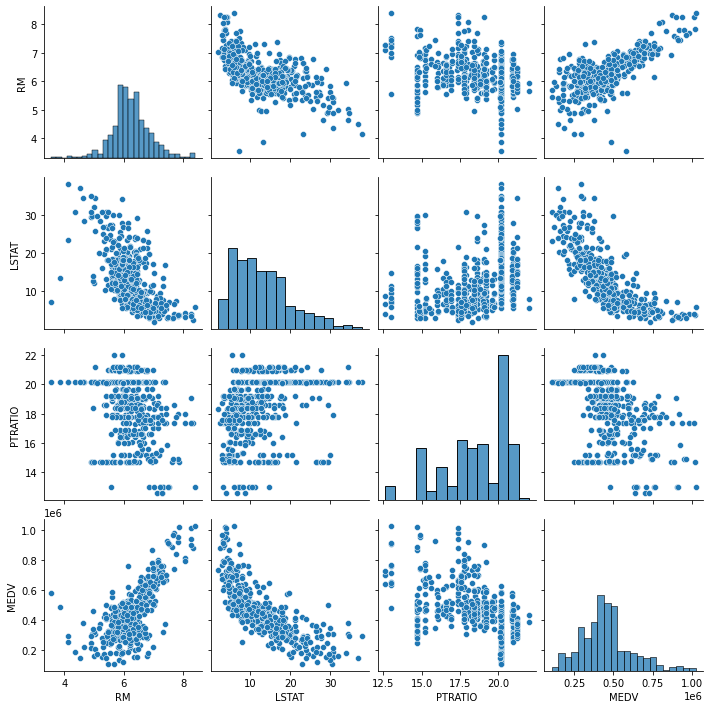

In [20]:
sns.pairplot(df);

### Análise da Normalidade

Gráfico QQ-Plot

In [21]:
import scipy.stats as stats

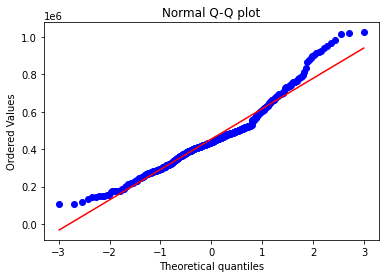

In [22]:
stats.probplot(df['MEDV'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [23]:
import plotly.express as px

In [24]:
hist =  px.histogram (df,  x = "MEDV", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Média dos valores') 
hist.show()

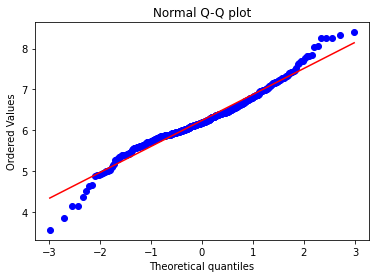

In [25]:
stats.probplot(df['RM'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [26]:
hist =  px.histogram (df,  x = "RM", nbins=40) 
hist.update_layout(width=800,height=500,title_text='Quantidade de cômodos') 
hist.show()

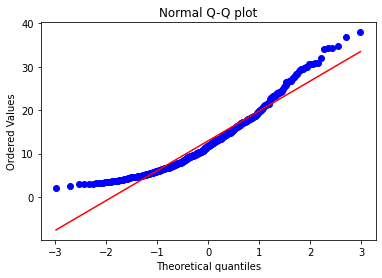

In [27]:
stats.probplot(df['LSTAT'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [28]:
hist =  px.histogram (df,  x = "LSTAT", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Quantidade de Classe Baixa (%)') 
hist.show()

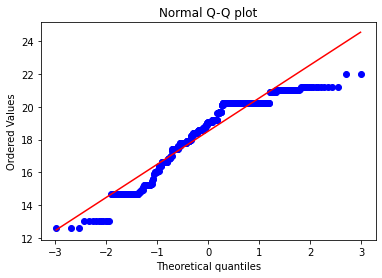

In [29]:
stats.probplot(df['PTRATIO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [30]:
hist =  px.histogram (df,  x = "PTRATIO", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Relação Estudantes/Professores') 
hist.show()

Teste Shapiro-Wilk

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [31]:
stats.shapiro(df.MEDV)

ShapiroResult(statistic=0.9596613645553589, pvalue=2.5757390664793434e-10)

In [32]:
estatistica, p = stats.shapiro(df.MEDV)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9596613645553589
p-valor: 2.5757390664793434e-10


In [33]:
estatistica, p = stats.shapiro(df.RM)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.970818281173706
p-valor: 2.7105865996190914e-08


In [34]:
estatistica, p = stats.shapiro(df.LSTAT)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9371760487556458
p-valor: 1.6900520425407878e-13


In [35]:
estatistica, p = stats.shapiro(df.PTRATIO)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9064712524414062
p-valor: 9.058795024736088e-17


Teste Lilliefors (Kolmogorov_Sminorv)

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [36]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [37]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.MEDV, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.11370576407672117
p-valor: 0.0009999999999998899


In [38]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.RM, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.06394344399233598
p-valor: 0.0009999999999998899


### Correlação Linear

Pearson (distribuição normal)

Spearman (distribuição não normal)

Kendall (distribuição não normal com quantidade pequena de amostras)

Ho = não há corrrelação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05

In [39]:
# Pearson
#coef,p = stats.pearsonr(df.MEDV, df.RM)
#print('Coeficiente de correlação: {}'.format(coef))
#print('p-valor: {}'.format(p))

In [40]:
# Spearman
coef,p = stats.spearmanr(df.MEDV, df.PTRATIO)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: -0.5592761164167336
p-valor: 1.3794858687631326e-41


In [41]:
# Kendall
#coef,p = stats.kendalltau(df.MEDV,df.RM)
#print('Coeficiente de correlação: {}'.format(coef))
#print('p-valor: {}'.format(p))

In [42]:
correlacoes = df.corr(method='spearman')
correlacoes

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.624700,-0.282053,0.624057
LSTAT,-0.624700,1.000000,0.461739,-0.845527
PTRATIO,-0.282053,0.461739,1.000000,-0.559276
MEDV,0.624057,-0.845527,-0.559276,1.000000


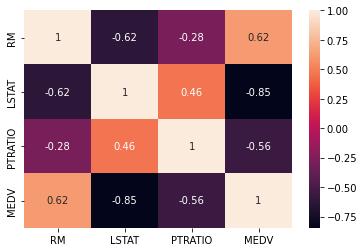

In [43]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

## **REGRESSÃO LINEAR SIMPLES**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

### Valor médio (MEDV) em função do número de cômodos (RM)

In [44]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [45]:
x1 = df.iloc[:,0:1].values
x1

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [46]:
y = df.iloc[:, 3].values
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [47]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size = 0.3, random_state = 10)

In [48]:
x_treino.shape, y_treino.shape

((342, 1), (342,))

In [49]:
x_teste.shape, y_teste.shape

((147, 1), (147,))

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
reg_linear1 = LinearRegression()
reg_linear1.fit(x_treino, y_treino)

LinearRegression()

In [52]:
# Intercepto (coeficiente linear)
reg_linear1.intercept_

-626510.2699464143

In [53]:
# Coeficiente Angular
reg_linear1.coef_

array([173771.45170999])

**Equação: Valor = -626510,27 + 173771,45.número_cômodos**

In [54]:
# Coeficiente de Determinação dados de treino
reg_linear1.score(x_treino, y_treino)

0.46368351515551953

In [55]:
# Coeficiente de Determinação dados de teste
reg_linear1.score(x_teste, y_teste)

0.5426573915930195

In [56]:
previsoes_treino = reg_linear1.predict(x_treino)
previsoes_treino

array([551833.94409904, 468423.64727824, 647755.78544295, 658182.07254555,
       586414.46298932, 464600.67534062, 395265.86610833, 229487.901177  ,
       441141.52935977, 424980.78435074, 523161.65456689, 432105.41387085,
       555135.60168153,  44768.84800928, 504915.65213734, 424285.6985439 ,
       565735.66023583, 607962.12300136, 455912.10275512, 442531.70097345,
       505784.50939589, 450003.87339698, 410210.21095539, 390226.49400874,
       472767.93357099, 809884.54988837, 401174.09546647, 639762.29866429,
       465817.07550259, 491882.79325909, 437318.55742215, 416813.52612037,
       413164.32563446, 560870.05958796, 396134.72336688, 459561.30324103,
       335488.4867201 , 521423.94004979, 441315.30081148, 630899.95462708,
       452262.90226921, 557915.94490889, 437144.78597044, 391616.66562242,
       525420.68343912, 459735.07469274, 397872.43788398, 492925.42196935,
       387619.92223309, 533240.39876607, 487538.50696634, 608483.43735649,
       832822.38151409, 4

In [57]:
import matplotlib.pyplot as plt

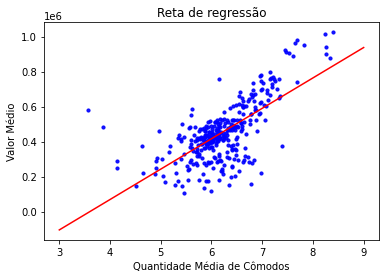

In [58]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(3, 9)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade Média de Cômodos')
plt.show()

In [59]:
previsoes_teste = reg_linear1.predict(x_teste)
previsoes_teste

array([419593.86934773, 438187.4146807 , 447744.84452475, 480935.19180136,
       491013.93600054, 494836.90793816, 563650.40281531, 438187.4146807 ,
       500745.1372963 , 482151.59196333, 452436.67372092, 452784.21662434,
       585719.37718248, 394744.5517532 , 321239.22767988, 442705.47242516,
       458171.13162735, 446702.21581449, 442357.92952174, 488581.1356766 ,
       592322.69234746, 244432.24602406, 412816.78273104, 540365.02828618,
       421331.58386483, 554092.97297127, 470856.44760218, 369373.91980354,
       732382.48242572, 411947.92547249, 484758.16373898, 514646.8534331 ,
       565561.88878412, 438534.95758412, 661483.73012804, 452957.98807605,
       579984.91927605, 402911.80998357, 351475.46027742, 537063.37070369,
       491535.25035567, 490145.07874199, 637503.26979206, 512735.36746429,
       722825.05258167, 631768.81188563, 489971.30729028, 353039.40334281,
       471551.53340902, 466512.16130943, 446007.13000765, 384492.03610231,
       390747.80836387, 3

In [60]:
y_teste

array([ 487200.,  428400.,  525000.,  483000.,  516600.,  462000.,
        592200.,  476700.,  512400.,  275100.,  487200.,  518700.,
        501900.,  499800.,  319200.,  621600.,  483000.,  445200.,
        373800.,  273000.,  644700.,  321300.,  510300.,  478800.,
        348600.,  462000.,  516600.,  405300.,  919800.,  266700.,
        455700.,  499800.,  627900.,  357000.,  665700.,  373800.,
        867300.,  327600.,  327600.,  501900.,  151200.,  499800.,
        726600.,  625800.,  835800.,  686700.,  338100.,  300300.,
        499800.,  493500.,  569100.,  220500.,  226800.,  411600.,
        478800.,  241500.,  655200.,  432600.,  441000.,  405300.,
        462000.,  252000.,  495600.,  577500.,  512400.,  392700.,
        279300.,  480900.,  497700.,  554400.,  399000.,  369600.,
        315000.,  445200.,  585900.,  105000.,  388500.,  453600.,
        312900.,  336000.,  315000.,  501900.,  323400.,  476700.,
        382200.,  609000.,  390600.,  413700.,  426300.,  2835

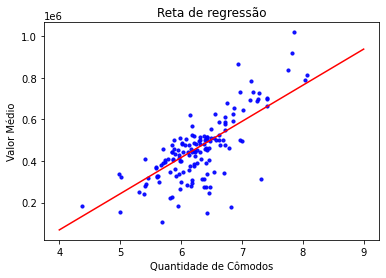

In [61]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(4, 9)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Cômodos')
plt.show()

In [62]:
# Fazendo previsões para valores distintos
valor_casa = reg_linear1.predict([[4]])
valor_casa

array([68575.53689355])

**Métricas de Desempenho**

In [63]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

76063.99733079868

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [65]:
# Erro médio absoluto
mean_absolute_error(y_teste, previsoes_teste)

76063.99733079868

In [66]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

11294624525.740473

In [67]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

106276.17101561607

### Valor médio (MEDV) em função da classe social (LSTAT)

In [68]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [69]:
x2 = df.iloc[:,1:2].values
x2

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [70]:
y = df.iloc[:, 3].values
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [71]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x2, y, test_size = 0.3, random_state = 10)

In [72]:
x_treino.shape, y_treino.shape

((342, 1), (342,))

In [73]:
x_teste.shape, y_teste.shape

((147, 1), (147,))

In [74]:
from sklearn.linear_model import LinearRegression
reg_linear2 = LinearRegression()
reg_linear2.fit(x_treino, y_treino)

LinearRegression()

In [75]:
# Intercepto (coeficiente linear)
reg_linear2.intercept_

681977.7451055486

In [76]:
# Coeficiente Angular
reg_linear2.coef_

array([-17263.75010515])

**Equação: Valor = 681977,75 - 17263,75.LSTAT**

In [77]:
# Coeficiente de Determinação dados de treino
reg_linear2.score(x_treino, y_treino)

0.5688289563355992

In [78]:
previsoes_treino = reg_linear2.predict(x_treino)
previsoes_treino

array([549564.78179906, 401787.080899  , 547493.13178645, 392982.56834537,
       594968.4445756 , 475330.65634693, 474294.83134062, 172179.20450053,
       525050.25664975, 358109.79313297, 527812.45666658, 386940.25580857,
       595141.08207665, 451851.95620393, 590825.14455037, 383660.14328859,
       624489.45725541, 543004.55675911, 413526.4309705 , 422676.21852623,
       572180.29443681, 457548.99373862, 507095.9565404 , 397643.78087376,
       492594.40645207, 610505.81967024, 365533.20567819, 611541.64467654,
       527639.81916553, 401959.71840005, 578740.51947676, 435624.03110509,
       370021.78070552, 342054.50553518, 530229.3816813 , 587027.11952723,
       274553.24262406, 554743.90683061, 563548.41938423, 562339.95687687,
       420086.65601045, 613785.93219021, 536271.6942181 , 515555.19409192,
       280250.28015875, 437005.1311135 , 499672.54399519, 541105.54424754,
       359836.16814349, 475158.01884588, 422676.21852623, 533336.85670022,
       579948.98198412, 5

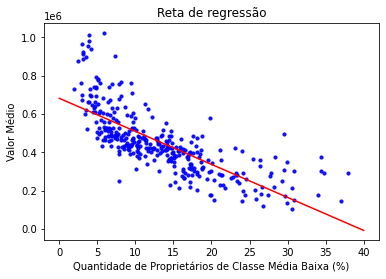

In [79]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(0, 40)
plt.plot(X_plot, X_plot*reg_linear2.coef_ + reg_linear2.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Proprietários de Classe Média Baixa (%)')
plt.show()

In [80]:
previsoes_teste = reg_linear2.predict(x_teste)
previsoes_teste

array([507441.2315425 , 438731.50612401, 518490.0316098 , 500708.36900149,
       594277.8945714 , 539897.08174018, 551981.70681378, 483789.89389845,
       580121.61948518, 272999.50511459, 558714.56935479, 553535.44432325,
       584610.19451251, 472395.81882905, 370194.41820658, 454959.43122285,
       496565.06897626, 474122.19383957, 363288.91816452, 348614.73057514,
       426646.88105041, 472741.09383115, 480855.05638057, 506578.04403724,
       357419.24312877, 570108.64442419, 573388.75694417, 447018.10617448,
       620346.15723017, 353793.85560668, 452887.78121023, 521770.14412977,
       562512.59437792, 420949.84351571, 591343.05705352, 378135.74325494,
       602737.13212292, 400578.61839164, 394536.30585483, 558024.01935059,
       180465.804551  , 557678.74434848, 567691.71940947, 603255.04462607,
       551463.79431063, 587199.75702829, 474294.83134062, 365360.56817713,
       490350.11893841, 601356.03211451, 351376.93059196, 300276.23028073,
       271273.13010408, 4

In [81]:
y_teste

array([ 487200.,  428400.,  525000.,  483000.,  516600.,  462000.,
        592200.,  476700.,  512400.,  275100.,  487200.,  518700.,
        501900.,  499800.,  319200.,  621600.,  483000.,  445200.,
        373800.,  273000.,  644700.,  321300.,  510300.,  478800.,
        348600.,  462000.,  516600.,  405300.,  919800.,  266700.,
        455700.,  499800.,  627900.,  357000.,  665700.,  373800.,
        867300.,  327600.,  327600.,  501900.,  151200.,  499800.,
        726600.,  625800.,  835800.,  686700.,  338100.,  300300.,
        499800.,  493500.,  569100.,  220500.,  226800.,  411600.,
        478800.,  241500.,  655200.,  432600.,  441000.,  405300.,
        462000.,  252000.,  495600.,  577500.,  512400.,  392700.,
        279300.,  480900.,  497700.,  554400.,  399000.,  369600.,
        315000.,  445200.,  585900.,  105000.,  388500.,  453600.,
        312900.,  336000.,  315000.,  501900.,  323400.,  476700.,
        382200.,  609000.,  390600.,  413700.,  426300.,  2835

In [82]:
# Coeficiente de Determinação dados de teste
reg_linear2.score(x_teste, y_teste)

0.6006038196307664

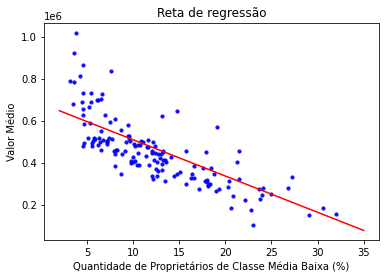

In [83]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(2, 35)
plt.plot(X_plot, X_plot*reg_linear2.coef_ + reg_linear2.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Proprietários de Classe Média Baixa (%)')
plt.show()

In [84]:
# Fazendo previsões para valores distintos
valor_casa = reg_linear2.predict([[25]])
valor_casa

array([250383.99247685])

**Métricas de Desempenho**

In [85]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

76340.55192245146

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [87]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

76340.55192245146

In [88]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

9863567949.634668

In [89]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

99315.49702657017

### **Validação Cruzada**

In [90]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [91]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [92]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, x2, y, cv = kfold)
resultado

array([0.73997836, 0.52496442, 0.2753212 , 0.77336843, 0.7096672 ,
       0.34726472, 0.66194425, 0.68820343, 0.411042  , 0.5519506 ,
       0.5776707 , 0.37648029, 0.60443851, 0.64797086, 0.5056103 ])

In [93]:
# Usamos a média e o desvio padrão
print("Coef. determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coef. determinação Médio: 55.97%


## **REGRESSÃO LINEAR MÚLTIPLA**

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [96]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [97]:
independente.shape

(489, 3)

In [98]:
dependente = df.iloc[:, 3].values
dependente

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [99]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [100]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [101]:
multipla = LinearRegression()
multipla.fit(x_treino, y_treino)

LinearRegression()

In [102]:
multipla.intercept_

434789.4550955225

In [103]:
multipla.coef_

array([ 85325.36412937, -10775.41479323, -20133.58779106])

In [104]:
print("Equação: Valor = {:.2f} + ({:.2f})*RM + ({:.2f})*LSTAT + ({:.2f})*PTRATIO".format(multipla.intercept_, multipla.coef_[0], multipla.coef_[1], multipla.coef_[2]))

Equação: Valor = 434789.46 + (85325.36)*RM + (-10775.41)*LSTAT + (-20133.59)*PTRATIO


In [105]:
# Coeficiente de Determinação
multipla.score(x_treino, y_treino)

0.7343049403294957

**TESTE**

In [106]:
previsoes = multipla.predict(x_teste)
previsoes

array([418504.52251533, 682498.59311161, 310842.03220354, 399602.67212048,
       529013.04970446, 364349.16756502, 241564.07559959, 413075.10184459,
       476051.89023052, 371925.92192458, 324382.18849665, 357068.87403347,
       472650.96518839,  52625.76046357, 486476.7874084 , 312653.08514703,
       465067.60969605, 614663.51972717, 383059.21254559, 653229.85415898,
       677008.34036381, 653364.33988067,  15201.46316315, 452877.56192735,
       360692.75896586, 754677.40725013, 714803.22773315, 754640.19558449,
       430756.93101727, 422579.57707332, 378309.3992427 , 461958.22362764,
       472103.18520444, 681780.56381622, 457070.41410848, 769207.31373834,
       520822.33816699, 261675.315203  , 503180.52774604, 590132.54786611,
       324624.03541901, 452521.53520288, 400704.94316867, 498314.39406844,
       280336.01343561, 365481.99718596, 525798.46427921, 361547.63013434,
       716795.14226269, 407424.79029782, 679886.98036124, 445827.68346551,
       614892.98134094, 3

In [107]:
y_teste

array([ 417900.,  632100.,  281400.,  577500.,  474600.,  359100.,
        247800.,  474600.,  449400.,  411600.,  214200.,  214200.,
        428400.,  375900.,  577500.,  327600.,  420000.,  489300.,
        470400.,  640500.,  651000.,  690900.,  147000.,  441000.,
        367500.,  966000.,  756000.,  888300.,  455700.,  445200.,
        323400.,  455700.,  430500.,  867300.,  445200.,  875700.,
        415800.,  268800.,  590100.,  497700.,  231000.,  315000.,
        388500.,  449400.,  413700.,  352800.,  453600.,  306600.,
        898800.,  514500.,  743400.,  474600.,  600600.,  304500.,
        661500.,  489300.,  422100.,  184800.,  525000.,  249900.,
        407400.,  361200.,  428400.,  392700.,  428400.,  472500.,
        258300.,  550200.,  346500.,  199500.,  302400.,  611100.,
        396900.,  585900.,  279300.,  483000.,  462000.,  218400.,
        518700.,  420000.,  392700.,  980700.,  455700.,  514500.,
        480900.,  520800.,  485100.,  525000.,  390600.,  5691

In [108]:
# Coeficiente de Determinação
multipla.score(x_teste, y_teste)

0.6817814124380092

In [109]:
# Fazendo previsões para valores distintos
valor_casa = multipla.predict([[6,20,12]])
valor_casa

array([489630.29051446])

**MÉTRICAS**

In [110]:
# Erro absoluto
abs(y_teste - previsoes).mean()

71651.46435650405

In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [112]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes)

71651.46435650405

In [113]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes)

9232768512.15146

In [114]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes))

96087.2963099257

### **Validação Cruzada**

In [115]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [116]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [117]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.83061794, 0.77028683, 0.46606666, 0.81532627, 0.79492754,
       0.60625828, 0.82164061, 0.7750116 , 0.58744519, 0.74753069,
       0.76227037, 0.51253844, 0.71206526, 0.73425176, 0.45176491])

In [118]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 69.25%


**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

## **REGRESSÃO POLINOMIAL**

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html 

Valor médio (MEDV) em função do número de cômodos (RM)

In [119]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [120]:
x1 = df.iloc[:,0:1].values
x1

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [121]:
y = df.iloc[:, 3].values
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [122]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size = 0.3, random_state = 0)

In [123]:
x_treino.shape, y_treino.shape

((342, 1), (342,))

In [124]:
x_teste.shape, y_teste.shape

((147, 1), (147,))

In [125]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [126]:
# Pré Processamento
grau_polinomial =PolynomialFeatures(degree=2)

In [127]:
x_poly = grau_polinomial.fit_transform(x_treino)
x_poly

array([[ 1.      ,  6.266   , 39.262756],
       [ 1.      ,  6.951   , 48.316401],
       [ 1.      ,  6.619   , 43.811161],
       ...,
       [ 1.      ,  6.021   , 36.252441],
       [ 1.      ,  6.03    , 36.3609  ],
       [ 1.      ,  6.02    , 36.2404  ]])

In [128]:
polinomial = LinearRegression()

In [129]:
polinomial.fit(x_poly, y_treino)

LinearRegression()

In [130]:
previsoes_treino = polinomial.predict(x_poly)

In [131]:
polinomial.coef_

array([      0.        , -568528.11104731,   60092.59048475])

In [132]:
polinomial.intercept_

1640107.0085836346

**Equação:**

Valor = 1640107 - 568528.11*RM + 60092.59*RM^2

In [133]:
numeros = np.linspace(3,9.84,342)
numeros

array([3.        , 3.02005865, 3.0401173 , 3.06017595, 3.0802346 ,
       3.10029326, 3.12035191, 3.14041056, 3.16046921, 3.18052786,
       3.20058651, 3.22064516, 3.24070381, 3.26076246, 3.28082111,
       3.30087977, 3.32093842, 3.34099707, 3.36105572, 3.38111437,
       3.40117302, 3.42123167, 3.44129032, 3.46134897, 3.48140762,
       3.50146628, 3.52152493, 3.54158358, 3.56164223, 3.58170088,
       3.60175953, 3.62181818, 3.64187683, 3.66193548, 3.68199413,
       3.70205279, 3.72211144, 3.74217009, 3.76222874, 3.78228739,
       3.80234604, 3.82240469, 3.84246334, 3.86252199, 3.88258065,
       3.9026393 , 3.92269795, 3.9427566 , 3.96281525, 3.9828739 ,
       4.00293255, 4.0229912 , 4.04304985, 4.0631085 , 4.08316716,
       4.10322581, 4.12328446, 4.14334311, 4.16340176, 4.18346041,
       4.20351906, 4.22357771, 4.24363636, 4.26369501, 4.28375367,
       4.30381232, 4.32387097, 4.34392962, 4.36398827, 4.38404692,
       4.40410557, 4.42416422, 4.44422287, 4.46428152, 4.48434

In [134]:
numeros.shape

(342,)

In [135]:
valor = 1640107 -568528.11*numeros + 60092.59*numeros**2

In [136]:
import matplotlib.pyplot as plt

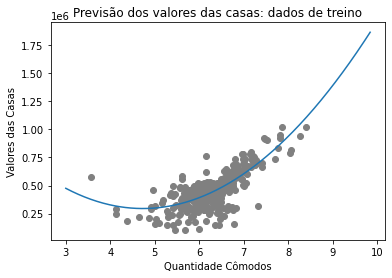

In [137]:
plt.scatter(x_treino, y_treino, c = "gray")
plt.xlabel("Quantidade Cômodos")
plt.ylabel("Valores das Casas")
plt.title("Previsão dos valores das casas: dados de treino")
plt.plot(numeros, valor);

In [138]:
# Fazendo previsões para valores distintos
comodos = 6
valor = 1640107 -568528.11*comodos + 60092.59*comodos**2
valor

392271.5799999996

In [139]:
# Coeficiente de Determinação dados de treino
polinomial.score(x_poly, y_treino)

0.5864656525780776

**TESTE**

In [140]:
numeros2 = np.linspace(3,8.88,147)
numeros2

array([3.        , 3.04027397, 3.08054795, 3.12082192, 3.16109589,
       3.20136986, 3.24164384, 3.28191781, 3.32219178, 3.36246575,
       3.40273973, 3.4430137 , 3.48328767, 3.52356164, 3.56383562,
       3.60410959, 3.64438356, 3.68465753, 3.72493151, 3.76520548,
       3.80547945, 3.84575342, 3.8860274 , 3.92630137, 3.96657534,
       4.00684932, 4.04712329, 4.08739726, 4.12767123, 4.16794521,
       4.20821918, 4.24849315, 4.28876712, 4.3290411 , 4.36931507,
       4.40958904, 4.44986301, 4.49013699, 4.53041096, 4.57068493,
       4.6109589 , 4.65123288, 4.69150685, 4.73178082, 4.77205479,
       4.81232877, 4.85260274, 4.89287671, 4.93315068, 4.97342466,
       5.01369863, 5.0539726 , 5.09424658, 5.13452055, 5.17479452,
       5.21506849, 5.25534247, 5.29561644, 5.33589041, 5.37616438,
       5.41643836, 5.45671233, 5.4969863 , 5.53726027, 5.57753425,
       5.61780822, 5.65808219, 5.69835616, 5.73863014, 5.77890411,
       5.81917808, 5.85945205, 5.89972603, 5.94      , 5.98027

In [141]:
numeros2.shape

(147,)

In [142]:
valor2 = 1640107 -568528.11*numeros2 + 60092.59*numeros2**2

In [143]:
import matplotlib.pyplot as plt

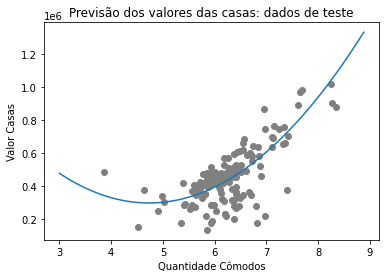

In [144]:
plt.scatter(x_teste, y_teste, c = "gray")
plt.xlabel("Quantidade Cômodos")
plt.ylabel("Valor Casas")
plt.title("Previsão dos valores das casas: dados de teste")
plt.plot(numeros2, valor2);

In [145]:
x_poly_teste = grau_polinomial.fit_transform(x_teste)
x_poly_teste

array([[ 1.      ,  5.834   , 34.035556],
       [ 1.      ,  6.842   , 46.812964],
       [ 1.      ,  5.403   , 29.192409],
       [ 1.      ,  6.852   , 46.949904],
       [ 1.      ,  6.417   , 41.177889],
       [ 1.      ,  6.406   , 41.036836],
       [ 1.      ,  4.903   , 24.039409],
       [ 1.      ,  6.112   , 37.356544],
       [ 1.      ,  6.163   , 37.982569],
       [ 1.      ,  5.965   , 35.581225],
       [ 1.      ,  6.223   , 38.725729],
       [ 1.      ,  5.837   , 34.070569],
       [ 1.      ,  6.041   , 36.493681],
       [ 1.      ,  4.628   , 21.418384],
       [ 1.      ,  6.727   , 45.252529],
       [ 1.      ,  5.757   , 33.143049],
       [ 1.      ,  6.279   , 39.425841],
       [ 1.      ,  6.51    , 42.3801  ],
       [ 1.      ,  5.807   , 33.721249],
       [ 1.      ,  6.739   , 45.414121],
       [ 1.      ,  7.327   , 53.684929],
       [ 1.      ,  7.135   , 50.908225],
       [ 1.      ,  4.519   , 20.421361],
       [ 1.      ,  5.85    , 34.2

In [146]:
polinomial_teste = LinearRegression()

In [147]:
polinomial_teste.fit(x_poly_teste, y_teste)

LinearRegression()

In [148]:
# Coeficiente de Determinação dados de teste
polinomial.score(x_poly_teste, y_teste)

0.5391879530755564

In [149]:
previsoes_teste = polinomial_teste.predict(x_poly_teste)

**MÉTRICAS**

In [150]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [151]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

88894.00551287511

In [152]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

13149352560.413319

In [153]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

114670.6264063004

**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

## **REGRESSÃO POR VETORES DE SUPORTE**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html 

In [154]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [155]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [156]:
independente.shape

(489, 3)

In [157]:
dependente = df.iloc[:, 3].values
dependente

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [158]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [159]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [160]:
# kernel = rbf, linear, polinomial (poly)
from sklearn.svm import SVR
SVR = SVR(kernel='rbf')
SVR.fit(x_treino,y_treino)

SVR()

In [161]:
SVR.score(x_treino, y_treino)

-0.006148700884580638

In [162]:
SVR.score(x_teste, y_teste)

-0.0029977270958452262

**Padronização de escala**

In [163]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
x_treino_scaler = x_scaler.fit_transform(x_treino)

In [164]:
x_treino_scaler

array([[ 0.05327517, -0.70150711, -0.05467118],
       [ 1.12799963, -0.44487061, -0.52922816],
       [ 0.60711128, -0.79792304,  0.230063  ],
       ...,
       [-0.33111532, -0.36121561, -0.33940537],
       [-0.31699486,  0.84398345, -0.29194967],
       [-0.33268427, -0.38815536, -0.90887374]])

In [165]:
y_scaler = StandardScaler()
y_treino_scaler = y_scaler.fit_transform(y_treino.reshape(-1,1))

In [166]:
y_treino_scaler

array([[-1.05925606e-02],
       [ 6.46900118e-01],
       [ 2.85923746e-01],
       [-1.13728667e-01],
       [ 1.44111599e-01],
       [-7.84113359e-01],
       [-1.24822584e+00],
       [-2.81324840e-01],
       [-1.39512694e-01],
       [-1.01616960e+00],
       [ 2.00056152e+00],
       [ 1.21414870e+00],
       [ 1.27860877e+00],
       [-1.52404707e-01],
       [ 9.04740384e-01],
       [ 2.29945267e-03],
       [-2.81324840e-01],
       [ 2.73031732e-01],
       [-2.81324840e-01],
       [ 2.73031732e-01],
       [ 4.27735892e-01],
       [ 2.60139719e-01],
       [-1.06773765e+00],
       [-1.17087376e+00],
       [ 3.49603506e+00],
       [ 9.04740384e-01],
       [-2.07331469e+00],
       [ 1.69895626e-01],
       [ 4.27735892e-01],
       [ 2.76119030e+00],
       [-3.45784907e-01],
       [ 2.73031732e-01],
       [-1.48028208e+00],
       [ 1.57003612e-01],
       [-1.91080747e-01],
       [-1.01616960e+00],
       [ 3.37491799e-01],
       [-2.34845740e-02],
       [ 1.9

In [167]:
x_teste_scaler = x_scaler.transform(x_teste)
x_teste_scaler

array([[-6.24507256e-01, -6.20687880e-01,  1.17917695e+00],
       [ 9.56985082e-01, -8.43295235e-01, -2.61727885e+00],
       [-1.30072075e+00,  1.98112421e+00, -1.81053199e+00],
       [ 9.72674490e-01,  9.82935809e-01,  7.99531373e-01],
       [ 2.90185237e-01, -5.72479917e-01, -3.39405369e-01],
       [ 2.72926888e-01,  9.46070896e-01,  7.99531373e-01],
       [-2.08519115e+00,  2.33134087e+00, -1.81053199e+00],
       [-1.88341711e-01, -2.51777567e-02,  7.99531373e-01],
       [-1.08325729e-01, -2.13755962e-01, -2.44493974e-01],
       [-4.18976010e-01,  1.39296468e-01,  1.17917695e+00],
       [-1.41892805e-02,  1.26651206e+00,  7.99531373e-01],
       [-6.19800434e-01,  4.03022379e-01,  7.99531373e-01],
       [-2.99736508e-01, -7.29864736e-01,  5.14797187e-01],
       [-2.51664988e+00,  3.05162455e+00,  7.99531373e-01],
       [ 7.76556889e-01, -4.85989161e-01,  1.13172126e+00],
       [-7.45315699e-01,  6.32719141e-01,  1.27408835e+00],
       [ 7.36714050e-02, -1.24429444e-01

In [168]:
y_teste_scaler = y_scaler.transform(y_teste.reshape(-1,1))
y_teste_scaler

array([[-2.29756787e-01],
       [ 1.08522857e+00],
       [-1.06773765e+00],
       [ 7.50036225e-01],
       [ 1.18327572e-01],
       [-5.90733160e-01],
       [-1.27400987e+00],
       [ 1.18327572e-01],
       [-3.63765873e-02],
       [-2.68432827e-01],
       [-1.48028208e+00],
       [-1.48028208e+00],
       [-1.65296720e-01],
       [-4.87597053e-01],
       [ 7.50036225e-01],
       [-7.84113359e-01],
       [-2.16864774e-01],
       [ 2.08571666e-01],
       [ 9.25435458e-02],
       [ 1.13679662e+00],
       [ 1.20125669e+00],
       [ 1.44620494e+00],
       [-1.89282650e+00],
       [-8.79446405e-02],
       [-5.39165106e-01],
       [ 3.13505869e+00],
       [ 1.84585736e+00],
       [ 2.65805419e+00],
       [ 2.29945267e-03],
       [-6.21606139e-02],
       [-8.09897386e-01],
       [ 2.29945267e-03],
       [-1.52404707e-01],
       [ 2.52913406e+00],
       [-6.21606139e-02],
       [ 2.58070211e+00],
       [-2.42648800e-01],
       [-1.14508973e+00],
       [ 8.2

In [169]:
from sklearn.svm import SVR
SVR2 = SVR(kernel='rbf')
SVR2.fit(x_treino_scaler, y_treino_scaler.ravel())

# .ravel() é para retornar matriz 1D

SVR()

In [170]:
SVR2.score(x_treino_scaler, y_treino_scaler)

0.8714780218682298

**TESTE**

In [171]:
SVR2.score(x_teste_scaler, y_teste_scaler)

0.8141963480712318

In [172]:
previsoes_teste = SVR2.predict(x_teste_scaler)
previsoes_teste

array([-2.15791224e-01,  1.10142277e+00, -6.88494535e-01, -1.07563769e+00,
        3.01247352e-01, -9.98869785e-01, -5.59722487e-01, -2.77421653e-01,
       -2.73937823e-02, -4.12691897e-01, -1.16997042e+00, -5.18534667e-01,
       -2.21332947e-02, -1.40012104e+00,  2.00513309e-02, -7.36008350e-01,
       -6.93655466e-02,  5.92234013e-01, -2.48820576e-01,  1.07290408e+00,
        1.76335951e+00,  1.75215955e+00, -1.13186294e+00, -9.89244717e-02,
       -2.62519149e-01,  2.76202189e+00,  1.95334571e+00,  2.71163016e+00,
       -3.10648675e-01, -2.12642736e-01, -9.48038395e-01, -3.73399265e-01,
        1.92487075e-03,  1.41767802e+00, -1.05707405e-01,  2.19221752e+00,
        6.84125100e-02, -1.21422076e+00,  1.73245025e-01,  5.77702833e-01,
       -1.14127434e+00, -3.64357403e-01, -2.10842559e-01,  1.39103054e-01,
       -6.03862563e-01, -4.32397688e-01,  2.77358169e-01, -7.89247973e-01,
        1.58912076e+00, -2.49546698e-01,  1.47592810e+00, -1.13924390e-01,
        8.76296120e-01, -

In [173]:
y_teste_scaler

array([[-2.29756787e-01],
       [ 1.08522857e+00],
       [-1.06773765e+00],
       [ 7.50036225e-01],
       [ 1.18327572e-01],
       [-5.90733160e-01],
       [-1.27400987e+00],
       [ 1.18327572e-01],
       [-3.63765873e-02],
       [-2.68432827e-01],
       [-1.48028208e+00],
       [-1.48028208e+00],
       [-1.65296720e-01],
       [-4.87597053e-01],
       [ 7.50036225e-01],
       [-7.84113359e-01],
       [-2.16864774e-01],
       [ 2.08571666e-01],
       [ 9.25435458e-02],
       [ 1.13679662e+00],
       [ 1.20125669e+00],
       [ 1.44620494e+00],
       [-1.89282650e+00],
       [-8.79446405e-02],
       [-5.39165106e-01],
       [ 3.13505869e+00],
       [ 1.84585736e+00],
       [ 2.65805419e+00],
       [ 2.29945267e-03],
       [-6.21606139e-02],
       [-8.09897386e-01],
       [ 2.29945267e-03],
       [-1.52404707e-01],
       [ 2.52913406e+00],
       [-6.21606139e-02],
       [ 2.58070211e+00],
       [-2.42648800e-01],
       [-1.14508973e+00],
       [ 8.2

**Revertendo a transformação**

In [174]:
y_teste_inverse = y_scaler.inverse_transform(y_teste_scaler)
previsoes_inverse = y_scaler.inverse_transform(previsoes_teste.reshape(-1, 1))

In [175]:
y_teste_inverse

array([[ 417900.],
       [ 632100.],
       [ 281400.],
       [ 577500.],
       [ 474600.],
       [ 359100.],
       [ 247800.],
       [ 474600.],
       [ 449400.],
       [ 411600.],
       [ 214200.],
       [ 214200.],
       [ 428400.],
       [ 375900.],
       [ 577500.],
       [ 327600.],
       [ 420000.],
       [ 489300.],
       [ 470400.],
       [ 640500.],
       [ 651000.],
       [ 690900.],
       [ 147000.],
       [ 441000.],
       [ 367500.],
       [ 966000.],
       [ 756000.],
       [ 888300.],
       [ 455700.],
       [ 445200.],
       [ 323400.],
       [ 455700.],
       [ 430500.],
       [ 867300.],
       [ 445200.],
       [ 875700.],
       [ 415800.],
       [ 268800.],
       [ 590100.],
       [ 497700.],
       [ 231000.],
       [ 315000.],
       [ 388500.],
       [ 449400.],
       [ 413700.],
       [ 352800.],
       [ 453600.],
       [ 306600.],
       [ 898800.],
       [ 514500.],
       [ 743400.],
       [ 474600.],
       [ 600

In [176]:
previsoes_inverse

array([[420174.87212807],
       [634737.89796179],
       [343175.49828345],
       [280113.15005471],
       [504396.08603148],
       [292617.99343947],
       [364151.37652378],
       [410135.79618577],
       [450863.2230036 ],
       [388101.41673155],
       [264747.14617165],
       [370860.52420003],
       [451720.11197717],
       [227257.55557269],
       [458591.63091728],
       [335435.89942756],
       [444026.37735555],
       [551795.35352618],
       [414794.66988335],
       [630092.44529088],
       [742561.7980311 ],
       [740737.41964992],
       [270954.53338452],
       [439211.47830344],
       [412563.2881634 ],
       [905235.45836988],
       [773508.94404311],
       [897027.07241   ],
       [404723.39514996],
       [420687.73421742],
       [300897.99727853],
       [394501.85450868],
       [455638.98377251],
       [686253.20534829],
       [438106.59583664],
       [812419.14319062],
       [466469.25822128],
       [257539.14000176],
       [4835

**MÉTRICAS**

In [177]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [178]:
# Erro médio Absoluto
mean_absolute_error(y_teste_inverse, previsoes_inverse)

54733.899498823375

In [179]:
# Erro quadrático médio
mean_squared_error(y_teste_inverse, previsoes_inverse)

5390892216.930902

In [180]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste_inverse, previsoes_inverse))

73422.6955166514

### **Validação Cruzada**

**Padronização de escala**

In [181]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler()
independente_scaler = x.fit_transform(independente)

In [182]:
independente_scaler

array([[ 0.52055395, -1.1250769 , -1.5250831 ],
       [ 0.28104837, -0.53706982, -0.33974768],
       [ 1.46924486, -1.25935736, -0.33974768],
       ...,
       [ 1.14420158, -1.03178731,  1.17748167],
       [ 0.86114953, -0.91305511,  1.17748167],
       [-0.32704695, -0.71516812,  1.17748167]])

In [183]:
y = StandardScaler()
dependente_scaler = y.fit_transform(dependente.reshape(-1,1))

In [184]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [185]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [186]:
# Criando o modelo
from sklearn.svm import SVR
modelo = SVR(kernel='rbf')
resultado = cross_val_score(modelo, independente_scaler, dependente_scaler.ravel(), cv = kfold)
resultado

array([0.92812888, 0.84684121, 0.77550142, 0.84579676, 0.87130224,
       0.73027848, 0.8773257 , 0.8323081 , 0.81165058, 0.86738849,
       0.91428868, 0.65473478, 0.78365184, 0.83876782, 0.77741225])

In [187]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação médio: 82.37%


**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

## **REGRESSÃO COM ÁRVORE DE DECISÃO**

https://scikit-learn.org/stable/modules/tree.html#regression 

In [188]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [189]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [190]:
independente.shape

(489, 3)

In [191]:
dependente = df.iloc[:, 3].values
dependente

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [192]:
dependente.shape

(489,)

In [193]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [194]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [195]:
y_treino.shape, y_teste.shape

((342,), (147,))

In [196]:
from sklearn.tree import DecisionTreeRegressor
arvore = DecisionTreeRegressor(max_depth=5, random_state=10)
arvore.fit(x_treino, y_treino)

DecisionTreeRegressor(max_depth=5, random_state=10)

In [197]:
arvore.score(x_treino, y_treino)

0.9050951127606555

**TESTE**

In [198]:
arvore.score(x_teste, y_teste)

0.8256951550328737

In [199]:
previsoes_teste = arvore.predict(x_teste)
previsoes_teste

array([449000.        , 597187.5       , 311850.        , 296100.        ,
       507223.25581395, 313740.        , 340200.        , 408900.        ,
       454268.18181818, 408900.        , 245855.55555556, 313740.        ,
       449000.        , 193760.        , 529433.33333333, 348600.        ,
       454268.18181818, 507223.25581395, 411075.        , 598823.07692308,
       715130.76923077, 789600.        , 193760.        , 449000.        ,
       411075.        , 914200.        , 715130.76923077, 914200.        ,
       408900.        , 408900.        , 313740.        , 411075.        ,
       408900.        , 688380.        , 454268.18181818, 940800.        ,
       507223.25581395, 245855.55555556, 507223.25581395, 507223.25581395,
       245855.55555556, 411075.        , 453000.        , 507223.25581395,
       411075.        , 408900.        , 507223.25581395, 313740.        ,
       940800.        , 408900.        , 688380.        , 454268.18181818,
       598823.07692308, 3

In [200]:
y_teste

array([ 417900.,  632100.,  281400.,  577500.,  474600.,  359100.,
        247800.,  474600.,  449400.,  411600.,  214200.,  214200.,
        428400.,  375900.,  577500.,  327600.,  420000.,  489300.,
        470400.,  640500.,  651000.,  690900.,  147000.,  441000.,
        367500.,  966000.,  756000.,  888300.,  455700.,  445200.,
        323400.,  455700.,  430500.,  867300.,  445200.,  875700.,
        415800.,  268800.,  590100.,  497700.,  231000.,  315000.,
        388500.,  449400.,  413700.,  352800.,  453600.,  306600.,
        898800.,  514500.,  743400.,  474600.,  600600.,  304500.,
        661500.,  489300.,  422100.,  184800.,  525000.,  249900.,
        407400.,  361200.,  428400.,  392700.,  428400.,  472500.,
        258300.,  550200.,  346500.,  199500.,  302400.,  611100.,
        396900.,  585900.,  279300.,  483000.,  462000.,  218400.,
        518700.,  420000.,  392700.,  980700.,  455700.,  514500.,
        480900.,  520800.,  485100.,  525000.,  390600.,  5691

**MÉTRICAS**

In [201]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [202]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

52954.00426293284

In [203]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

5057266756.343771

In [204]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

71114.46235713077

### **Validação Cruzada**

In [205]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [206]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [207]:
# Criando o modelo
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor(max_depth=5, random_state=10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.9107871 , 0.91994845, 0.70416127, 0.79571349, 0.64537243,
       0.62424022, 0.83188854, 0.77916943, 0.74608406, 0.45125985,
       0.92525406, 0.72678715, 0.72120525, 0.84170908, 0.56581873])

In [208]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 74.60%


**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

## **REGRESSÃO COM RANDOM FOREST**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 

In [209]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [210]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [211]:
independente.shape

(489, 3)

In [212]:
dependente = df.iloc[:, 3].values
dependente

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [213]:
dependente.shape

(489,)

In [214]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [215]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [216]:
y_treino.shape, y_teste.shape

((342,), (147,))

In [217]:
from sklearn.ensemble import RandomForestRegressor

In [218]:
random = RandomForestRegressor(n_estimators=60, criterion='squared_error', max_depth=5, random_state = 10)
random.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=5, n_estimators=60, random_state=10)

In [219]:
random.score(x_treino, y_treino)

0.9160346630571496

**TESTE**

In [220]:
random.score(x_teste, y_teste)

0.8465287311346861

In [221]:
previsoes_teste = random.predict(x_teste)
previsoes_teste

array([429790.1184383 , 626425.24570752, 319291.        , 369687.79212278,
       504007.08094948, 275038.77411657, 325784.08333333, 419935.2164072 ,
       461145.73252911, 407252.93004329, 250872.39578869, 342808.74084789,
       454388.83705035, 207628.59742739, 523389.0588747 , 343148.06749092,
       436277.53376586, 519168.2986373 , 400302.89135561, 591299.21535976,
       617998.62691853, 737021.36549068, 207628.59742739, 433990.65598718,
       378602.16484354, 911394.60227273, 690510.8130319 , 913862.10227273,
       420589.43787112, 423405.52420844, 326646.08924392, 380183.19387172,
       436732.30908567, 687715.29521126, 434483.34195931, 890163.5       ,
       529306.19369936, 231323.99610428, 491146.52058414, 505014.08035269,
       256106.89211222, 382749.3212387 , 424659.14608592, 488901.56840275,
       401002.16125623, 406066.93224785, 503825.27539393, 325390.61402888,
       856473.33333333, 421515.20723289, 693269.282585  , 434272.60667474,
       558379.53436472, 3

In [222]:
y_teste

array([ 417900.,  632100.,  281400.,  577500.,  474600.,  359100.,
        247800.,  474600.,  449400.,  411600.,  214200.,  214200.,
        428400.,  375900.,  577500.,  327600.,  420000.,  489300.,
        470400.,  640500.,  651000.,  690900.,  147000.,  441000.,
        367500.,  966000.,  756000.,  888300.,  455700.,  445200.,
        323400.,  455700.,  430500.,  867300.,  445200.,  875700.,
        415800.,  268800.,  590100.,  497700.,  231000.,  315000.,
        388500.,  449400.,  413700.,  352800.,  453600.,  306600.,
        898800.,  514500.,  743400.,  474600.,  600600.,  304500.,
        661500.,  489300.,  422100.,  184800.,  525000.,  249900.,
        407400.,  361200.,  428400.,  392700.,  428400.,  472500.,
        258300.,  550200.,  346500.,  199500.,  302400.,  611100.,
        396900.,  585900.,  279300.,  483000.,  462000.,  218400.,
        518700.,  420000.,  392700.,  980700.,  455700.,  514500.,
        480900.,  520800.,  485100.,  525000.,  390600.,  5691

**MÉTRICAS**

In [223]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [224]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

49730.29595322481

In [225]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

4452803054.515374

In [226]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

66729.326795011

### **Validação Cruzada**

In [227]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [228]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [229]:
# Criando o modelo
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(n_estimators=60, criterion='squared_error', max_depth=5, random_state = 10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.9390087 , 0.9048205 , 0.78576987, 0.78178487, 0.80471035,
       0.73189206, 0.88019637, 0.85442545, 0.7796746 , 0.82002933,
       0.93538902, 0.72717569, 0.80683864, 0.8863317 , 0.78974059])

In [230]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 82.85%


**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0,92/0,85; RMSE = 66729,3. R^2 Validação Cruzada: 82,85%.

## **REGRESSÃO COM XGBOOST**

https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor 

In [231]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [232]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [233]:
independente.shape

(489, 3)

In [234]:
dependente = df.iloc[:, 3].values

In [235]:
dependente.shape

(489,)

In [236]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [237]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [238]:
from xgboost import XGBRegressor

In [239]:
xgboost = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=0.05, objective="reg:squarederror", random_state=10)
xgboost.fit(x_treino, y_treino)

XGBRegressor(learning_rate=0.05, n_estimators=180, objective='reg:squarederror',
             random_state=10)

In [240]:
xgboost.score(x_treino, y_treino)

0.9269256727642161

**TESTE**

In [241]:
xgboost.score(x_teste, y_teste)

0.8416164650842644

In [242]:
previsoes_teste = xgboost.predict(x_teste)

In [243]:
# Fazendo previsões para valores distintos
valor_casa = xgboost.predict([[6,20,12]])
valor_casa

array([368061.16], dtype=float32)

**MÉTRICAS**

In [244]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [245]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

51063.76605017007

In [246]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

67788.84234677578

### **Validação Cruzada**

In [247]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [248]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [249]:
# Criando o modelo
from xgboost import XGBRegressor
modelo = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=0.05, objective = "reg:squarederror")
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.95352272, 0.90664315, 0.77445699, 0.79897621, 0.83737888,
       0.71638268, 0.90830893, 0.83769017, 0.83258437, 0.84008661,
       0.9032208 , 0.71795708, 0.76351618, 0.89191949, 0.79971926])

In [250]:
# Usamos a média e o desvio padrão
print("Coeficiente de determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de determinação Médio: 83.22%


**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0,92/0,85; RMSE = 66729,3. R^2 Validação Cruzada: 82,85%.

**REGRESSÃO COM XGBOOST:** R^2 = 0,93/0,84; RMSE = 67788,8. R^2 Validação Cruzada: 83,22%.

## **REGRESSÃO COM LIGHT GBM**

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html 

In [251]:
# Instalação do Algoritmo
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [252]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [253]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [254]:
independente.shape

(489, 3)

In [255]:
dependente = df.iloc[:, 3].values

In [256]:
dependente.shape

(489,)

In [257]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [258]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [259]:
import lightgbm as lgb

In [260]:
lgbm = lgb.LGBMRegressor(num_leaves=50, max_depth=3, learning_rate=0.1, n_estimators=50, random_state=10)
lgbm.fit(x_treino, y_treino)

LGBMRegressor(max_depth=3, n_estimators=50, num_leaves=50, random_state=10)

In [261]:
lgbm.score(x_treino, y_treino)

0.8814914688459106

**TESTE**

In [262]:
lgbm.score(x_teste, y_teste)

0.821790912114666

In [263]:
previsoes_teste = lgbm.predict(x_teste)

In [264]:
# Fazendo previsões para valores distintos
valor_casa = lgbm.predict([[8,12,25]])
valor_casa

array([473777.6547499])

**MÉTRICAS**

In [265]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [266]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

55114.09314449551

In [267]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

71906.49585704789

### **Validação Cruzada**

In [268]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [269]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [270]:
# Criando o modelo
import lightgbm as lgb
modelo = lgb.LGBMRegressor(num_leaves=50, max_depth=3, learning_rate=0.1, n_estimators=50)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.92885902, 0.87411091, 0.79183715, 0.82557057, 0.84077803,
       0.69153561, 0.8972966 , 0.853766  , 0.78817415, 0.84598833,
       0.9151854 , 0.680427  , 0.7801631 , 0.86306132, 0.78006315])

In [271]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 82.38%


**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0,92/0,85; RMSE = 66729,3. R^2 Validação Cruzada: 82,85%.

**REGRESSÃO COM XGBOOST:** R^2 = 0,93/0,84; RMSE = 67788,8. R^2 Validação Cruzada: 83,22%.

**REGRESSÃO COM LIGHT GBM:** R^2 = 0,88/0,82; RMSE = 71906,4. R^2 Validação Cruzada: 82,38%.

## **REGRESSÃO COM CATBOOST**

https://catboost.ai/en/docs/concepts/python-reference_catboostregressor 

In [272]:
#Instalação
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.7 MB/s 


In [273]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [274]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [275]:
independente.shape

(489, 3)

In [276]:
dependente = df.iloc[:, 3].values

In [277]:
dependente.shape

(489,)

In [278]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [279]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [280]:
from catboost.core import CatBoostRegressor

In [281]:
catboost = CatBoostRegressor (iterations=100, learning_rate=0.08, depth = 5, random_state = 10)
catboost.fit(x_treino, y_treino)

0:	learn: 153885.2754929	total: 48.6ms	remaining: 4.81s
1:	learn: 145560.6000514	total: 49.1ms	remaining: 2.41s
2:	learn: 138225.8372427	total: 49.9ms	remaining: 1.61s
3:	learn: 131355.6293814	total: 50.7ms	remaining: 1.22s
4:	learn: 125170.2577020	total: 53.2ms	remaining: 1.01s
5:	learn: 119550.2226179	total: 59.5ms	remaining: 932ms
6:	learn: 114409.0672213	total: 60.1ms	remaining: 798ms
7:	learn: 109536.2116181	total: 60.6ms	remaining: 696ms
8:	learn: 105434.3594366	total: 61.1ms	remaining: 617ms
9:	learn: 101243.2460951	total: 61.5ms	remaining: 554ms
10:	learn: 97472.9802508	total: 65.9ms	remaining: 533ms
11:	learn: 93927.2207626	total: 66.5ms	remaining: 487ms
12:	learn: 90880.1445218	total: 67ms	remaining: 448ms
13:	learn: 87832.0734456	total: 67.5ms	remaining: 414ms
14:	learn: 85013.5932920	total: 67.9ms	remaining: 385ms
15:	learn: 82307.6915610	total: 68.4ms	remaining: 359ms
16:	learn: 79857.8824898	total: 68.9ms	remaining: 337ms
17:	learn: 77586.4911189	total: 69.4ms	remaining: 

In [282]:
catboost.score(x_treino, y_treino)

0.8987749049972403

**TESTE**

In [283]:
catboost.score(x_teste, y_teste)

0.8356524921108562

In [284]:
previsoes_teste = catboost.predict(x_teste)

In [285]:
# Fazendo previsões para valores distintos
valor_casa = catboost.predict([[5,18,20]])
valor_casa

array([328451.4683164])

**MÉTRICAS**

In [286]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [287]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

52043.380841851125

In [288]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

69053.3516855943

### **Validação Cruzada**

In [289]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [290]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [291]:
# Criando o modelo
from catboost.core import CatBoostRegressor
modelo = CatBoostRegressor (iterations=100, learning_rate=0.08, depth = 5, random_state = 10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

0:	learn: 155861.3254260	total: 894us	remaining: 88.5ms
1:	learn: 147849.0945349	total: 3.21ms	remaining: 157ms
2:	learn: 140069.3123604	total: 4.92ms	remaining: 159ms
3:	learn: 133080.9174182	total: 5.72ms	remaining: 137ms
4:	learn: 126572.2230376	total: 10.4ms	remaining: 198ms
5:	learn: 120763.6466926	total: 12.7ms	remaining: 199ms
6:	learn: 115744.0292487	total: 17.1ms	remaining: 227ms
7:	learn: 111101.5795724	total: 19.7ms	remaining: 226ms
8:	learn: 106622.3873670	total: 24.7ms	remaining: 250ms
9:	learn: 102647.6071008	total: 25.8ms	remaining: 232ms
10:	learn: 98811.0949782	total: 29.3ms	remaining: 237ms
11:	learn: 95325.9824500	total: 32.4ms	remaining: 238ms
12:	learn: 92143.4946101	total: 33.6ms	remaining: 225ms
13:	learn: 89167.3773597	total: 34.3ms	remaining: 211ms
14:	learn: 86510.4687369	total: 36.9ms	remaining: 209ms
15:	learn: 84149.1642823	total: 40.2ms	remaining: 211ms
16:	learn: 81967.4747398	total: 41.1ms	remaining: 201ms
17:	learn: 80140.1505681	total: 45.5ms	remaining

array([0.94440689, 0.88935588, 0.7975338 , 0.82476037, 0.85586772,
       0.72996979, 0.87886289, 0.83549716, 0.81780425, 0.85273594,
       0.92537037, 0.70497553, 0.77807769, 0.87783237, 0.79681647])

In [292]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 83.40%


**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0,92/0,85; RMSE = 66729,3. R^2 Validação Cruzada: 82,85%.

**REGRESSÃO COM XGBOOST:** R^2 = 0,93/0,84; RMSE = 67788,8. R^2 Validação Cruzada: 83,22%.

**REGRESSÃO COM LIGHT GBM:** R^2 = 0,88/0,82; RMSE = 71906,4. R^2 Validação Cruzada: 82,38%.

**REGRESSÃO COM CATBOOST:** R^2 = 0,90/0,84; RMSE = 69053,3 R^2 Validação Cruzada: 83,40%.

# **Salvando dados para Deploy**

In [293]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [294]:
dependente = df.iloc[:, 3].values
dependente

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [295]:
np.savetxt('independente.csv', independente, delimiter=',')

In [296]:
np.savetxt('dependente.csv', dependente, delimiter=',')